## HW 4 Noah Rubin
## Titanic Kaggle Competition

In [22]:
# Preparation!
import sys
import numpy as np
import os
import pandas as pd
import sklearn
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Read Data

In [23]:
# Read Data
trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')
bothsets = [trainset,testset]

trainset.info()
trainset.dtypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
#whole data --> 891 passengers.
trainset.describe()
# 38% survival

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
testset.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [26]:
#note!!! lots of missing values in Age category
# rather than leaving empty fill this with average age, less random than missing info
trainset['Age'] = trainset['Age'].fillna(trainset['Age'].mean())
testset['Age'] = testset['Age'].fillna(testset['Age'].mean())

#one missing fare falue in testset, let's fill that with average Fare
testset['Fare'] = testset['Fare'].fillna(testset['Fare'].mean())

# Some data visualization & exploration

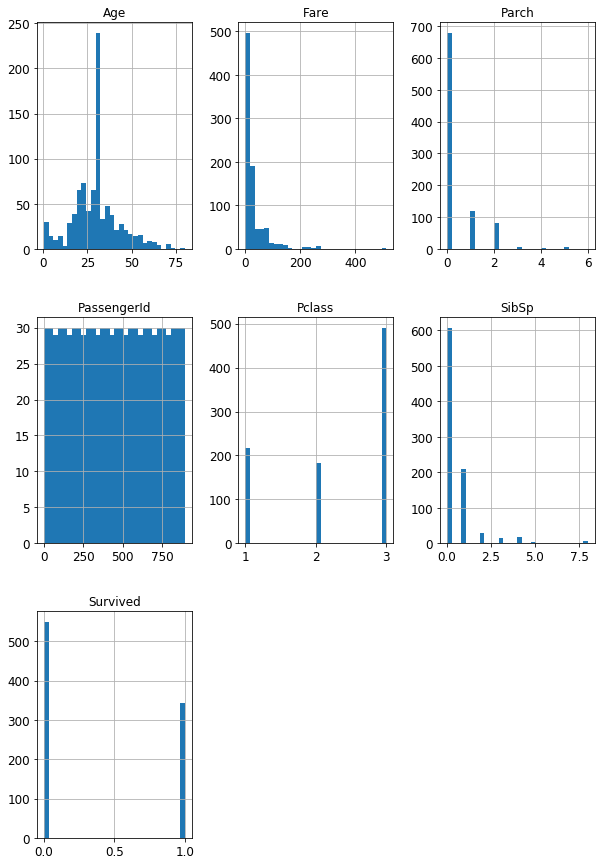

In [27]:
#Disstribution of some variables
trainset.hist(bins=30,figsize=(10,15))
plt.show()

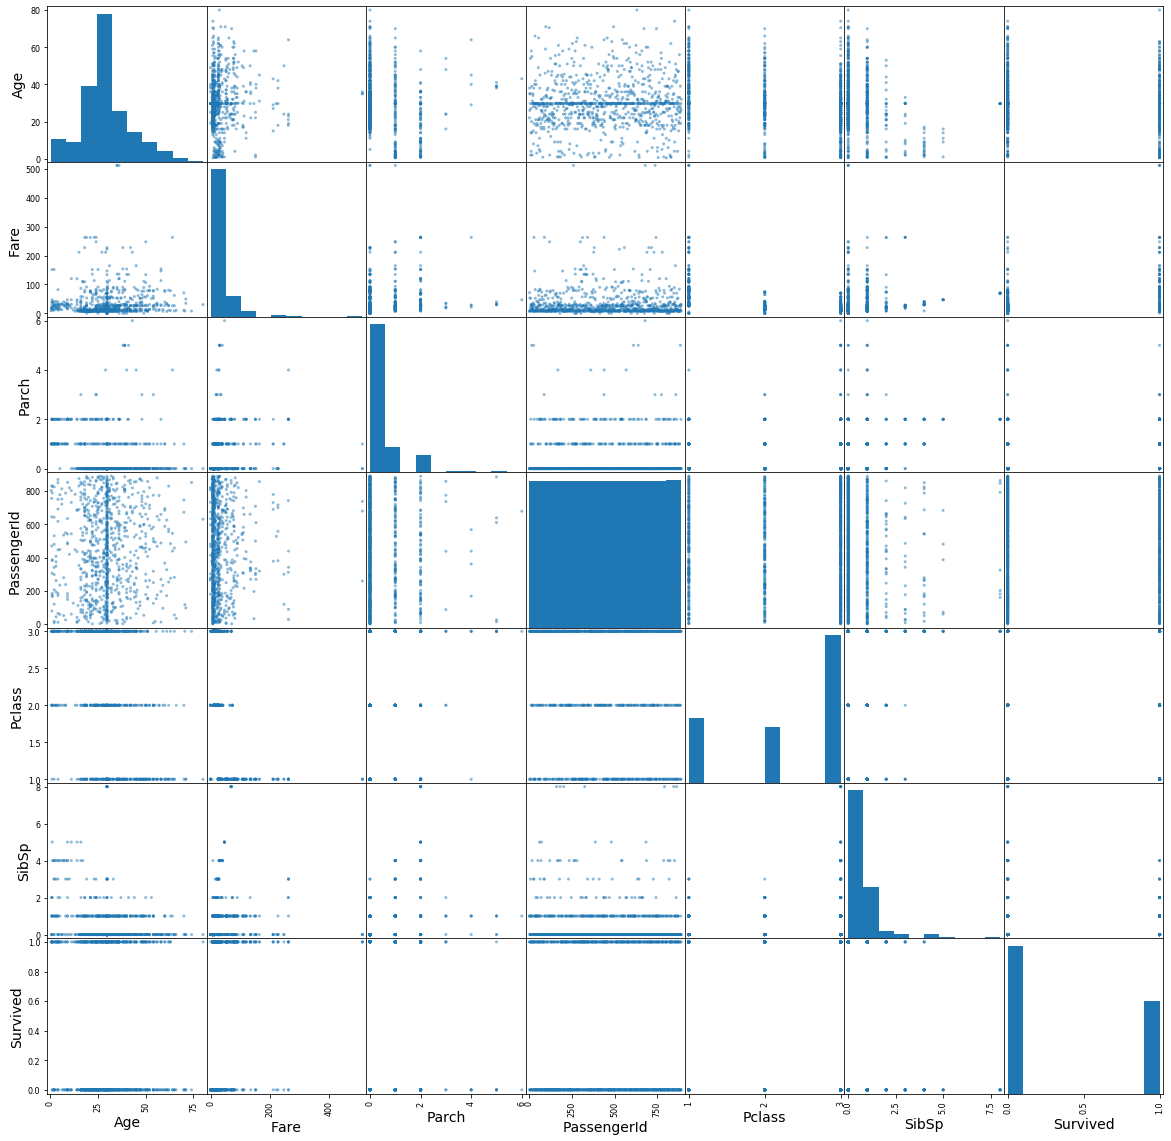

In [28]:
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# BETTER VISUALIZATION OF INPUTS

# look at correlations
from pandas.plotting import scatter_matrix
attributes = ['Sex','Ticket','Cabin','Embarked','Age','Fare','Parch','PassengerId','Pclass','SibSp','Survived']
_ = scatter_matrix(trainset[attributes], figsize=(20, 20))


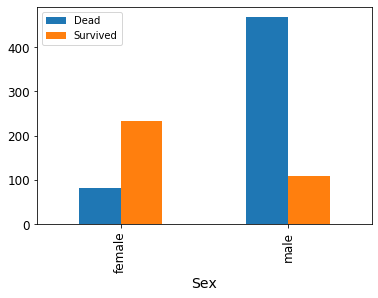

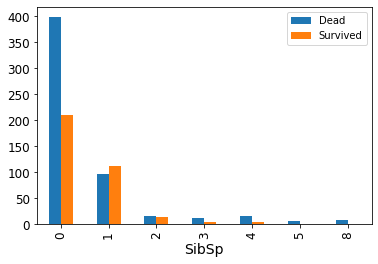

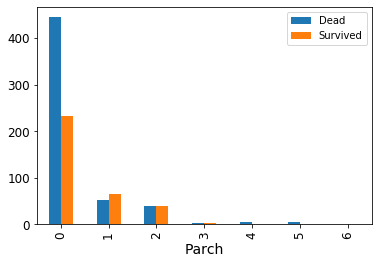

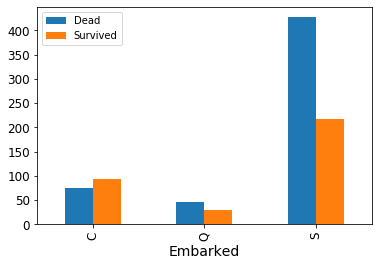

In [29]:
#no clear trend between any of the attributes as correlations
#need to visualize clearer how each one correlates with survival

# let's see distribution of a feature for those that died/survived
trainset['Dead'] = 1 - trainset['Survived']
# trainset.groupby('Sex').agg('sum')[['Dead','Survived']].plot(kind='bar')
survivebysex = trainset.groupby('Sex').agg('sum')[['Dead','Survived']]
survivebysex.plot(kind='bar')
#larger portion of males die than females

trainset.groupby('SibSp').agg('sum')[['Dead','Survived']].plot(kind='bar')
trainset.groupby('Parch').agg('sum')[['Dead','Survived']].plot(kind='bar')

trainset.groupby('Embarked').agg('sum')[['Dead','Survived']].plot(kind='bar')
# higher percentage died from S/Q and lower from Q; could be helpful information, let's encode these

### Encode for Embarked

In [30]:
tmp_list = []
for i in range(len(trainset['Embarked'])):
    if trainset['Embarked'][i] == 'S':
        tmp_list.append(0)
    elif trainset['Embarked'][i] == 'C':
        tmp_list.append(1)
    elif trainset['Embarked'][i] == 'Q':
        tmp_list.append(2)
    else:
        tmp_list.append(3)

trainset['Embarked'] = tmp_list

tmp_list = []
for i in range(len(testset['Embarked'])):
    if testset['Embarked'][i] == 'S':
        tmp_list.append(0)
    elif testset['Embarked'][i] == 'C':
        tmp_list.append(1)
    elif testset['Embarked'][i] == 'Q':
        tmp_list.append(2)
    else:
        tmp_list.append(3)

testset['Embarked'] = tmp_list

tmp_list = None

### encode for sex

In [31]:
trainset['Sex'] = trainset['Sex'].map({'male':1, 'female':0})
testset['Sex'] = testset['Sex'].map({'male':1, 'female':0})

### Let's section Cabins by letter to group people better and reduce variation

In [32]:
# testset
tmp_list = []
for i in range(len(trainset['Cabin'])):
    if type(trainset['Cabin'][i]) == float:
        tmp_list.append(0)
    else:
        tmp_list.append(ord(trainset['Cabin'][i][0]))
trainset['Cabin'] = tmp_list


# testset
tmp_list = []
for i in range(len(testset['Cabin'])):
    if type(testset['Cabin'][i]) == float:
        tmp_list.append(0)
    else:
        tmp_list.append(ord(testset['Cabin'][i][0]))
testset['Cabin'] = tmp_list
tmp_list = None

In [33]:
#check
# trainset['Cabin']
# testset['Cabin']

### What if we parse through age/fare?

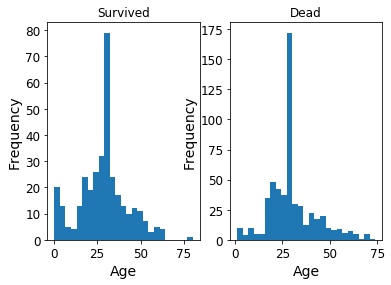

In [34]:
#let's group age bands and see

alive = trainset[trainset.Survived == 1] 
dead = trainset[trainset.Survived == 0]
plt.subplot(121)
alive.Age.plot(kind='hist',bins=25)
plt.title('Survived')
plt.xlabel('Age')
plt.subplot(122)
dead.Age.plot(kind='hist',bins=25)
plt.title('Dead')
plt.xlabel('Age')
#significantly more infant survived, and more elderly died but the oldest survived
# very high volume of ~30 year olds died --> let's group the ages.
trainset['AgeGroup'] = pd.cut(trainset['Age'], 10)
testset['AgeGroup'] = pd.cut(testset['Age'], 10)

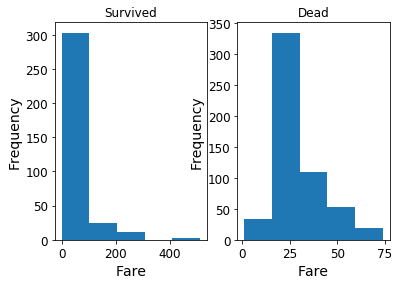

In [35]:
plt.subplot(121)
alive.Fare.plot(kind='hist',bins=5)
plt.title('Survived')
plt.xlabel('Fare')
plt.subplot(122)
dead.Age.plot(kind='hist',bins=5)
plt.title('Dead')
plt.xlabel('Fare')
#highest fare payers survived, good to group these as well
trainset['FareGroup'] = pd.cut(trainset['Fare'], 5)
testset['FareGroup'] = pd.cut(testset['Fare'], 5)

### Encode Age & Fare Groups

In [36]:
#later note, in future will make functions for these

#trainset

tmp_list = []
for i in range(len(trainset['AgeGroup'])):
     tmp_list.append(trainset['AgeGroup'][i].left)
        
trainset['AgeGroup'] = tmp_list

tmp_list = []
for i in range(len(trainset['FareGroup'])):
     tmp_list.append(trainset['FareGroup'][i].left)
        
trainset['FareGroup'] = tmp_list

#testset
tmp_list = []
for i in range(len(testset['AgeGroup'])):
     tmp_list.append(testset['AgeGroup'][i].left)
        
testset['AgeGroup'] = tmp_list

tmp_list = []
for i in range(len(testset['FareGroup'])):
     
    tmp_list.append(testset['FareGroup'][i].left)
        
testset['FareGroup'] = tmp_list

tmp_list = None

### assumption:  Drop complex features with little meaning/independence to survival

In [37]:
# beyond scope of this assignment these features may have importance but I am dropping them.

# Name is complex feature, so we'll take it out.
# PassID/TIcket are also specific to individual, lots of variations and hard to predict from

trainset = trainset.drop(columns=['Name','PassengerId','Ticket'])
testset = testset.drop(columns=['Name','PassengerId','Ticket'])
trainset.dtypes

Survived       int64
Pclass         int64
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin          int64
Embarked       int64
Dead           int64
AgeGroup     float64
FareGroup    float64
dtype: object

### Build final features for prediction + testing

In [38]:
features = (['Sex','AgeGroup','Pclass','FareGroup','Embarked','SibSp','Parch','Cabin'])
               
TrainX = trainset[features]
Trainy = trainset['Survived']

TestX = testset[features]
print(TrainX.dtypes)
print(TrainX.shape)
print(TestX.shape)
print(Trainy.shape)

Sex            int64
AgeGroup     float64
Pclass         int64
FareGroup    float64
Embarked       int64
SibSp          int64
Parch          int64
Cabin          int64
dtype: object
(891, 8)
(418, 8)
(891,)


# Create different models to test

# Evaluate Model Predictions

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,train_test_split,cross_validate


#RandomForest
RFclf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
#SGD
SGDclf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
#SVM
SVMclf = SVC(gamma="auto", random_state=42)
#KNN
KNNclf = KNeighborsClassifier()
#Logistic Regression
LRclf = LogisticRegression(random_state=0, solver='lbfgs')
#LDA
LDAclf = LinearDiscriminantAnalysis()

SGDscores = cross_validate(SGDclf,TrainX,Trainy,cv = 10,scoring='accuracy')

RFclfscores = cross_validate(RFclf,TrainX,Trainy,cv = 10,scoring='accuracy')

SVMclfscores = cross_validate(SVMclf,TrainX,Trainy,cv = 10,scoring='accuracy')

KNNclfscores = cross_validate(KNNclf,TrainX,Trainy,cv = 10,scoring='accuracy')

LRclfscores = cross_validate(LRclf,TrainX,Trainy,cv = 10,scoring='accuracy')

LDAclfscores = cross_validate(LDAclf,TrainX,Trainy,cv = 10,scoring='accuracy')

print('SGD Classifier')
print(np.mean(SGDscores['test_score']))
print('Random Forest Classifier')
print(np.mean(RFclfscores['test_score']))
print('SVM Classifier')
print(np.mean(SVMclfscores['test_score']))
print('KNN')
print(np.mean(KNNclfscores['test_score']))
print('LR')
print(np.mean(LRclfscores['test_score']))
print('LDA')
print(np.mean(LDAclfscores['test_score']))

# print(Testy)
# sgd_clf.fit(TrainX, y_train_5)

/home/nmr73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nmr73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nmr73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nmr73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nmr73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

SGD Classifier
0.6980722959936443
Random Forest Classifier
0.7980600953353763
SVM Classifier
0.7812569515378505
KNN
0.7699826920894336
LR
0.7945766655317218
LDA
0.7979851889683351


### Best Model is RF Classifier

In [44]:
RFclf.fit(TrainX,Trainy)
Testy = RFclf.predict(TestX)

testset = pd.read_csv('test.csv')
submission = pd.DataFrame({'PassengerId': testset['PassengerId'],'Survived':Testy})
submission.to_csv('titanic_submission.csv',index=False)

#note - in future will set up random search for hyper parameter tuning.
# did not have time to dive into model tuning, preparing for conference.

### Submit Results